# Временные ряды. Pylab (low level).

### Обработка временных рядов - один из базовых навыков анализа океанографических данных

Для теста используем массив аномалий температуры Гадлей центра (csv файл). Скачать можно [здесь](https://mega.nz/#!C0tDSKwJ!kWaLb9qzYT5MpFqayG_VGiJhcWfSZ_FcFa55DCvaSx4)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Идем в папку, куда скачали

In [2]:
cd /mnt/WORK2/Data/HadCRUT4

/mnt/WORK2/Data/HadCRUT4


In [3]:
ls

HadCRUT.4.6.0.0.median.nc  HadCRUT4.csv


In [4]:
!head HadCRUT4.csv

time,temperature_anomaly
1850-01-16,-0.905886
1850-02-15,-0.20506707
1850-03-16,-0.7614886
1850-04-16,-0.5868869
1850-05-16,-0.40005884
1850-06-16,-0.2075096
1850-07-16,-0.11059598
1850-08-16,-0.1619361
1850-09-16,-0.43730184


За все время работы мне доставались файлы временных серий, в которых данные записаны в абсолютно разных форматах. Я выбрал относительно простой:
* мы видим файл с данными, разделенными запятыми (далеко не всегда так делают)
* это 2 столбца в одном дата в формате ГГГГ-ММ-ДД (тоже не частый формат для даты у нас в институте), в другом, собственно, значения

Файл был получен осреднением HadCRUT.4.6.0.0.median.nc (по пространству). Рекомендую [скачать](https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT.4.6.0.0.median.nc) его тоже.

Пробуем прочитать

In [5]:
data = loadtxt('HadCRUT4.csv')

ValueError: could not convert string to float: 'time,temperature_anomaly'

Функция не может прочитать 1-ю строку, потому что она символьная, пропустим её с помощью skiprows

In [6]:
data = loadtxt('HadCRUT4.csv',skiprows=1)

ValueError: could not convert string to float: '1850-01-16,-0.905886'

Python сообщает нам, что не может перевести строку в число с плавующей точкой (это он делает по умолчанию). Укажем, что наш типа данных это просто какой-то обобщенный object.

In [7]:
data = loadtxt('HadCRUT4.csv',skiprows=1,dtype='object')

Вроде прочитал. Посмотрим содержимое

In [8]:
data

array(['1850-01-16,-0.905886', '1850-02-15,-0.20506707',
       '1850-03-16,-0.7614886', ..., '2018-09-16,0.66999197',
       '2018-10-16,0.82350284', '2018-11-16,0.64991194'], dtype=object)

Функция считает каждую строку данных просто символьной строкой, а хотелось бы указать, что наши данные разделены запятой ","

Для это воспользуемся параметром delimiter

In [9]:
data = loadtxt('HadCRUT4.csv',skiprows=1,dtype='object',delimiter=',')

In [10]:
data

array([['1850-01-16', '-0.905886'],
       ['1850-02-15', '-0.20506707'],
       ['1850-03-16', '-0.7614886'],
       ...,
       ['2018-09-16', '0.66999197'],
       ['2018-10-16', '0.82350284'],
       ['2018-11-16', '0.64991194']], dtype=object)

Мы получили массив (array) объектов. Разберем основные правила индексации в python

###  ~~1.~~ 0. Индексация начинается с 0!

In [11]:
data[0,0]

'1850-01-16'

In [12]:
data[0,1]

'-0.905886'

In [13]:
# Размерность массива
data.shape

(2027, 2)

In [14]:
# индекс за пределами массива
data[0,2]

IndexError: index 2 is out of bounds for axis 1 with size 2

### 1. Для итерации по индексу как и в Matlab пользуемся двоеточием по правилу:

[индекс начала]:[индекс следующий после окончания]:[шаг]

по умолчанию шаг = 1

In [15]:
#элементы 0-го столбца с 0 по 4-й (не 5-й!!!)
data[0:5,0]


array(['1850-01-16', '1850-02-15', '1850-03-16', '1850-04-16',
       '1850-05-16'], dtype=object)

In [16]:
#элементы 1-го столбца с 10-го по 40-й (не 50-й!!!) c шагом 10
data[10:50:10,1]


array(['-0.22106546', '0.024510305', '-0.06584187', '-0.25872257'],
      dtype=object)

In [17]:
#элементы 1-го столбца с 10-го по 50-й c шагом 10
data[10:50+1:10,1]


array(['-0.22106546', '0.024510305', '-0.06584187', '-0.25872257',
       '-0.28267363'], dtype=object)

### 2. Орицательные индексы соответствуют отчету в обратную сторону: "-1" - последний (1-й с конца), "-2" - предпоследний (2-й с конца)

In [18]:
# Дата последнего значения в массиве
data[-1,0]

'2018-11-16'

In [19]:
# даты от последней до 10-й с конца
data[-1:-10,0]

array([], dtype=object)

**Задание**: Почему индексация выдала нам пустой массив? Как правильно вывести все данные от последнего до 10-го с конца

### 3. Опущенные индексы - итерация от начала/до конца!

In [20]:
data[2000:,1]

array(['0.88641906', '0.7144225', '0.6563031', '0.6740899', '0.86820865',
       '0.9926601', '1.073655', '0.8250244', '0.6768873', '0.66833395',
       '0.7178803', '0.8165542', '0.6442949', '0.69114757', '0.69521326',
       '0.78278303', '0.6857754', '0.62867594', '0.6178256', '0.68146217',
       '0.62054694', '0.6610977', '0.6959786', '0.6933159', '0.66999197',
       '0.82350284', '0.64991194'], dtype=object)

In [21]:
data[:5]

array([['1850-01-16', '-0.905886'],
       ['1850-02-15', '-0.20506707'],
       ['1850-03-16', '-0.7614886'],
       ['1850-04-16', '-0.5868869'],
       ['1850-05-16', '-0.40005884']], dtype=object)

## Простейшая арифметика и визуализация данных

Сейчас мы не можем производить с массивом символьные операции, так как это все не числовые данные

In [22]:
mysst = data[:,1]+5

TypeError: can only concatenate str (not "int") to str

Для того, чтобы правильно работать, нужно преобразовать тип. Обычно это можно сделать командой astype

In [23]:
dates = data[:,0].astype('datetime64[D]')

In [24]:
dates

array(['1850-01-16', '1850-02-15', '1850-03-16', ..., '2018-09-16',
       '2018-10-16', '2018-11-16'], dtype='datetime64[D]')

мы видим, что это массив дат(времени)

In [25]:
asst = data[:,1].astype('float')

In [26]:
asst

array([-0.905886  , -0.20506707, -0.7614886 , ...,  0.66999197,
        0.82350284,  0.64991194])

Теперь это массив чисел.

In [27]:
asst.dtype

dtype('float64')

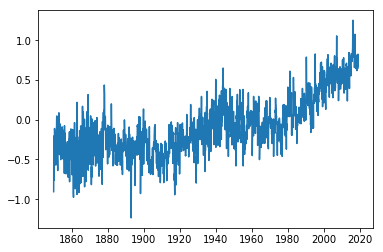

In [28]:
plot(dates,asst)

*Примечание*: Если 1 из массивов является массивом даты/времени, то ось на графике автоматически будет иметь вид оси времени

Изменим параметры по умолчанию

In [29]:
rcParams.update({'figure.dpi':150,'savefig.dpi':150,'savefig.bbox':'tight'})

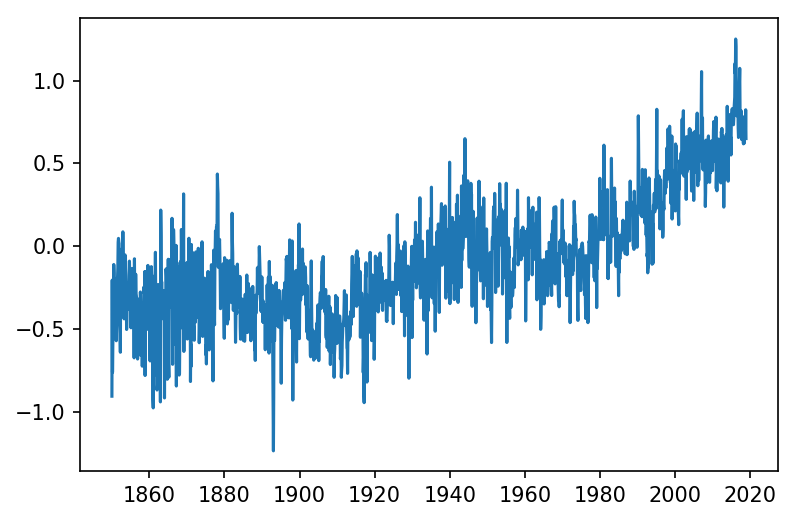

In [30]:
# figure(figsize=figaspect(0.3))
plot(dates,asst)
# grid(True,linestyle='--')
# xlabel('years')
# ylabel('Temperature anomaly [C]')
# title('HadCRUT4 data')

In [31]:
cd ~/notebooks/satellite_oceanography/

/home/mizyuk/notebooks/satellite_oceanography


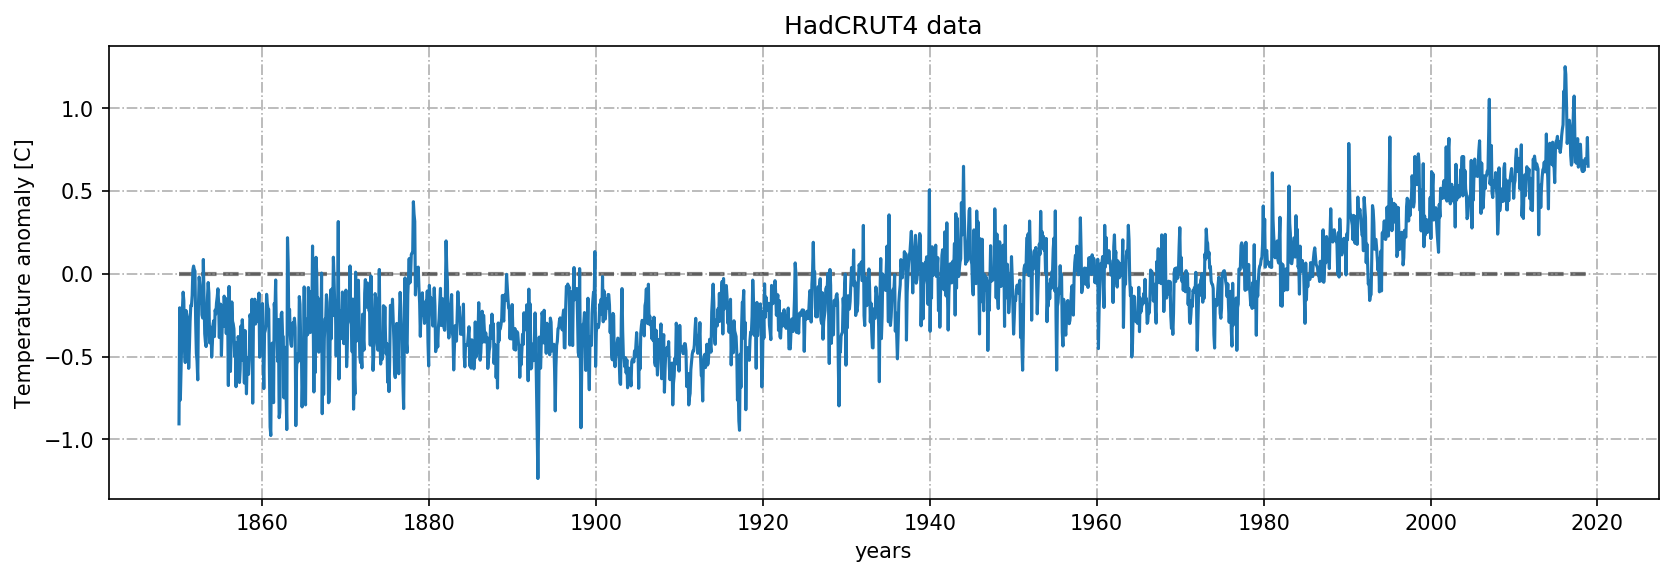

In [32]:
figure(figsize=figaspect(0.3))
plot(dates,asst)
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [C]')
title('HadCRUT4 data')
hlines(0.,dates[0],dates[-1],linestyle='--',lw=2,alpha=0.5)
savefig('./Results/hadcrut_00.png')

In [33]:
asst.mean()

-0.08137327323481995

In [34]:
# или
mean(asst)

-0.08137327323481995

In [35]:
std(asst)

0.3606176584055668

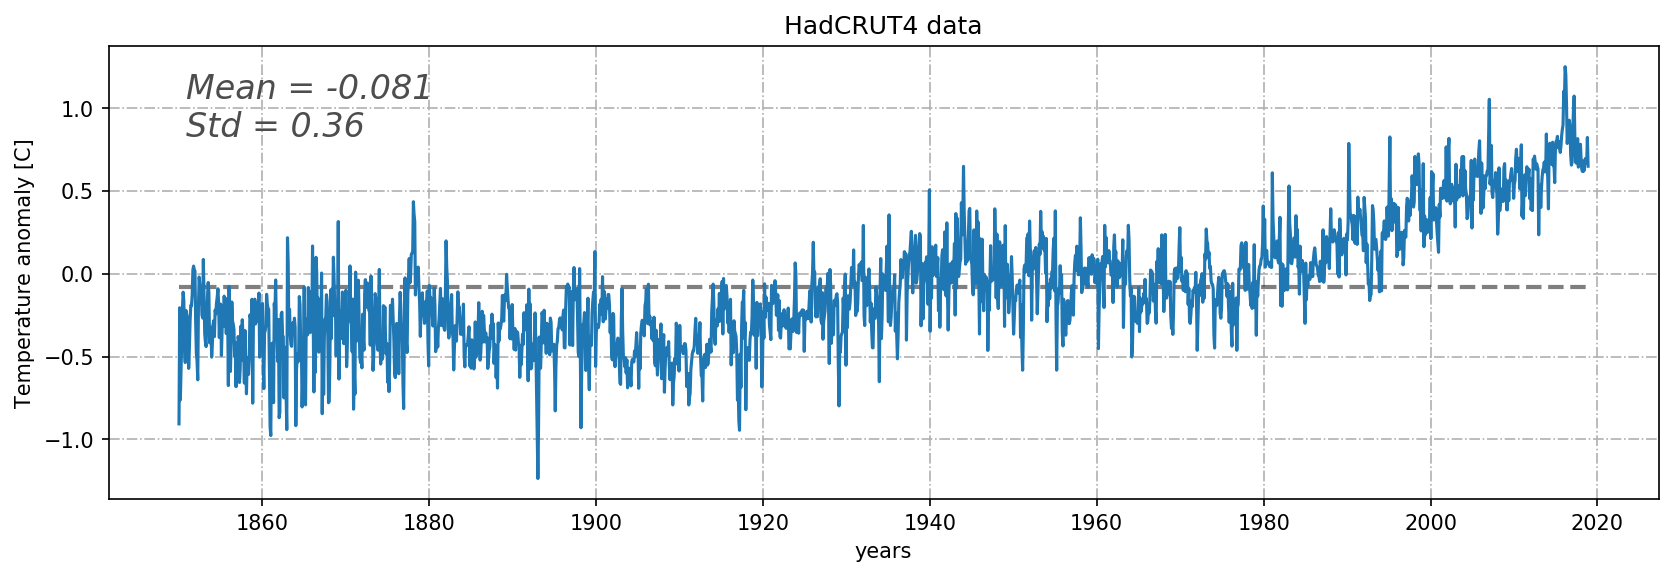

In [36]:
figure(figsize=figaspect(0.3))
plot(dates,asst)
annotate('Mean = {:4.2}\nStd = {:4.2}'.format(asst.mean(),asst.std()),(0.05,0.8),
         xycoords='axes fraction',fontsize=16,style='italic',color='0.3')
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [C]')
title('HadCRUT4 data')
hlines(asst.mean(),dates[0],dates[-1],linestyle='--',lw=2,alpha=0.5)
annotate
savefig('./Results/hadcrut_01.png')

In [37]:
print(r'$\widehat{T_a}$')

$\widehat{T_a}$


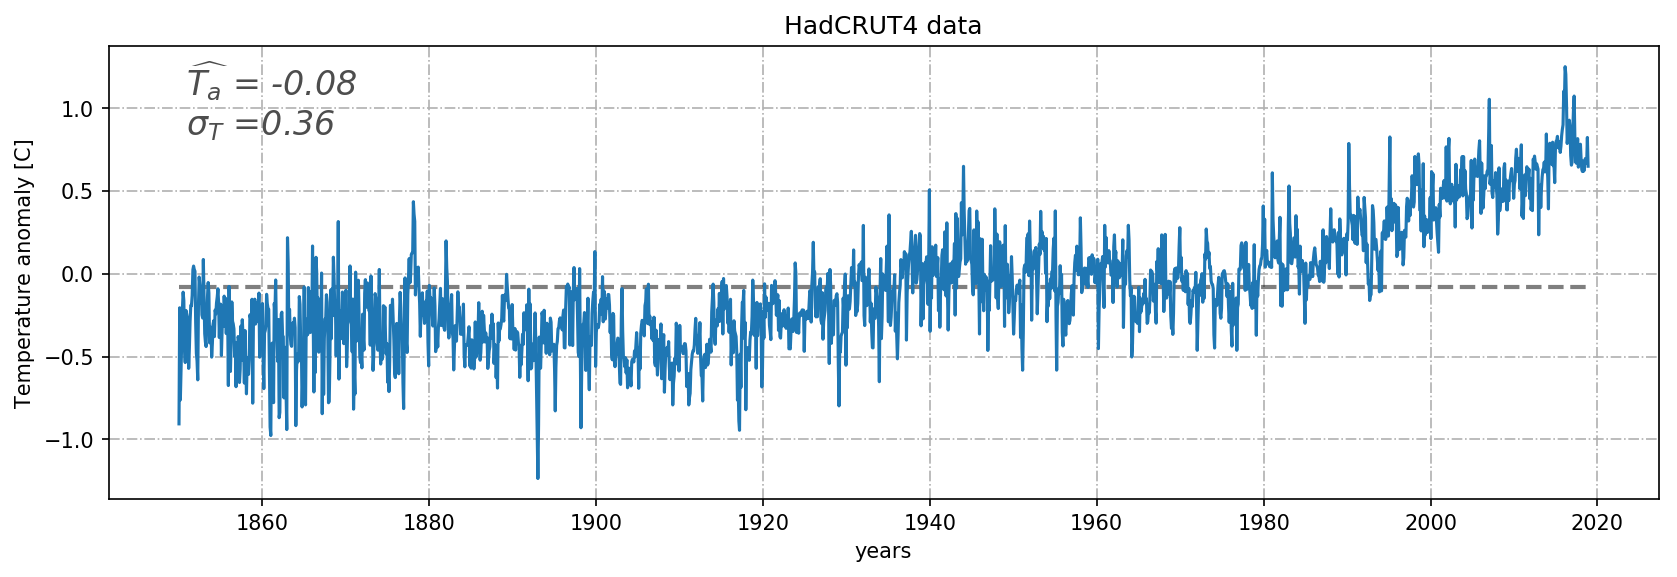

In [38]:
figure(figsize=figaspect(0.3))
plot(dates,asst)
annotate(r'$\widehat {T_a}$ = '+'{:4.2f}\n'.format(asst.mean())+r'$\sigma_T}$ ='+ '{:4.2f}'.format(asst.std()),
         (0.05,0.8),
         xycoords='axes fraction',fontsize=16,style='italic',color='0.3')
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [C]')
title('HadCRUT4 data')
hlines(asst.mean(),dates[0],dates[-1],linestyle='--',lw=2,alpha=0.5)
annotate
savefig('./Results/hadcrut_02.png')

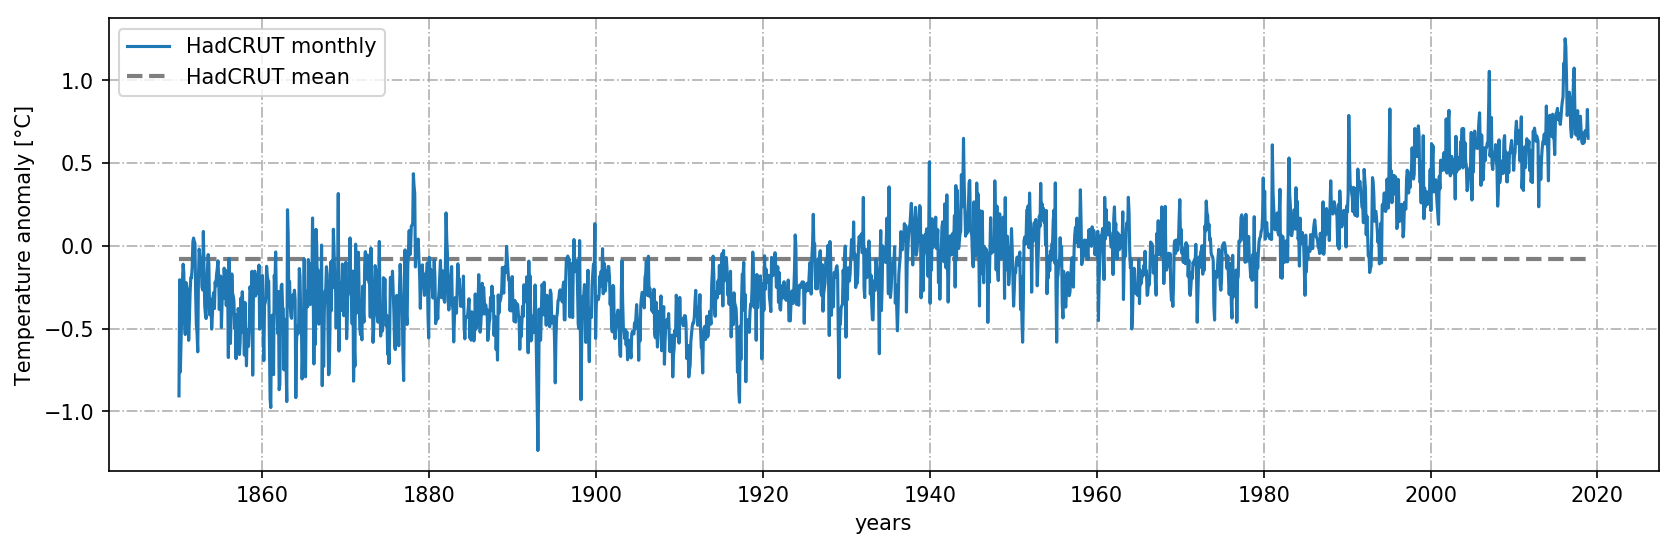

In [39]:
figure(figsize=figaspect(0.3))
plot(dates,asst,label='HadCRUT monthly')
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [\u00b0C]')
hlines(asst.mean(),dates[0],dates[-1],linestyle='--',lw=2,alpha=0.5,label='HadCRUT mean')
legend()
savefig('./Results/hadcrut_03.png')

In [40]:
sst0 = zeros_like(asst)

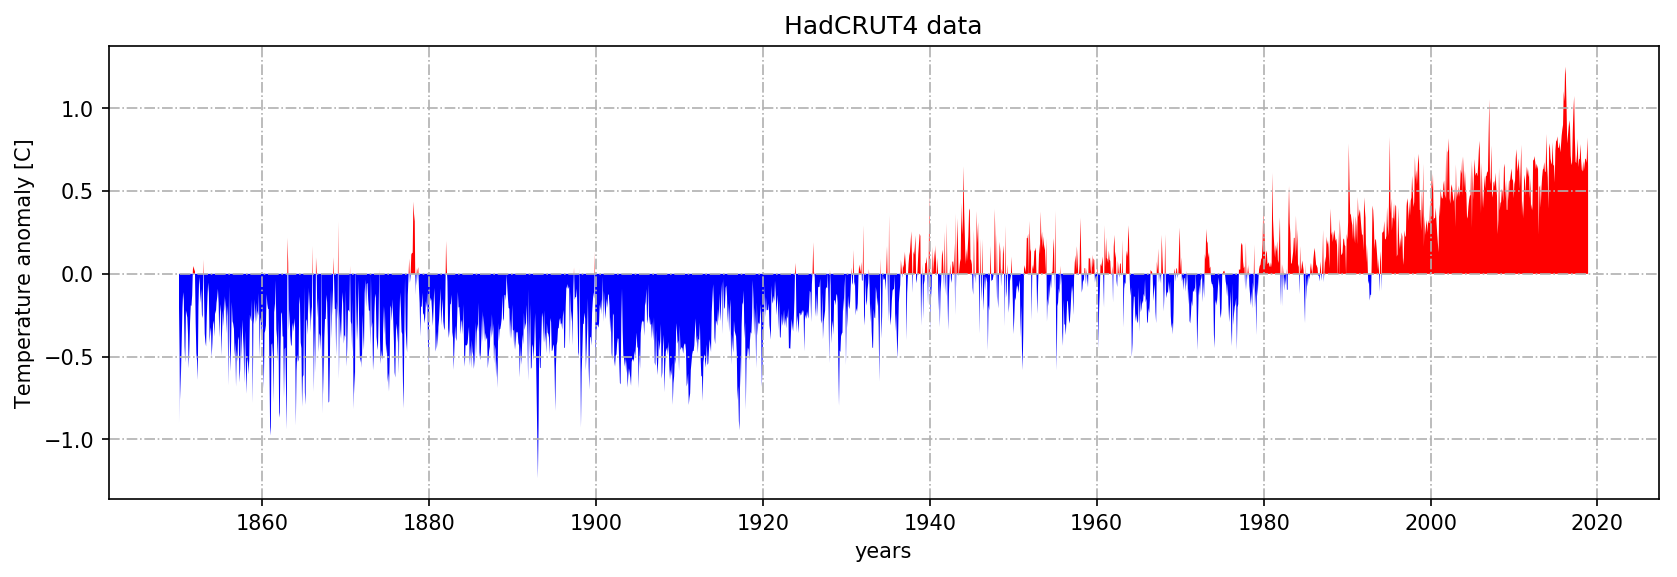

In [41]:
figure(figsize=figaspect(0.3))
fill_between(dates, asst, sst0, where=asst >= sst0, facecolor='red', interpolate=True)
fill_between(dates, asst, sst0, where=asst <= sst0, facecolor='blue', interpolate=True)
# plot(dates,asst)
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [C]')
title('HadCRUT4 data')
savefig('./Results/hadcrut_04.png')

Найдём среднегодовые значения

In [42]:
years = [d.tolist().year for d in dates]

In [43]:
years = array(years)

In [44]:
asst[years==2000]

array([0.2128306 , 0.6171289 , 0.50739837, 0.6043416 , 0.32508674,
       0.33719012, 0.33751714, 0.39949158, 0.31530446, 0.24475361,
       0.1852048 , 0.13000788])

In [45]:
asst[years==2000].mean()

0.35135465

In [46]:
assty = []
for y in unique(years):
    assty.append(asst[years==y].mean())

In [47]:
assty = array(assty)

In [48]:
datesy = arange('1850','2019',dtype='datetime64[Y]')

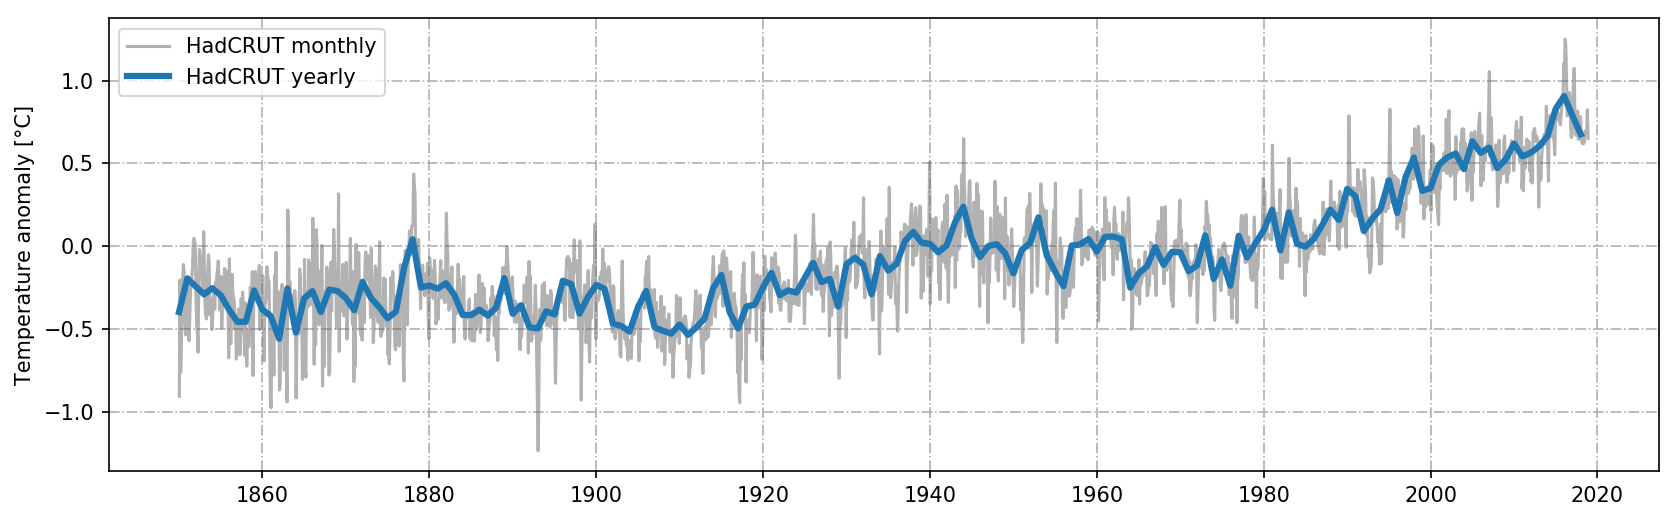

In [49]:
figure(figsize=figaspect(0.3))
plot(dates,asst,label='HadCRUT monthly',color='0.4',alpha=0.5)
plot(datesy,assty,label='HadCRUT yearly',lw=3.)
grid(True,linestyle='-.')
ylabel('Temperature anomaly [\u00b0C]')
legend()

Text(0.5, 1.0, 'HadCRUT4 data')

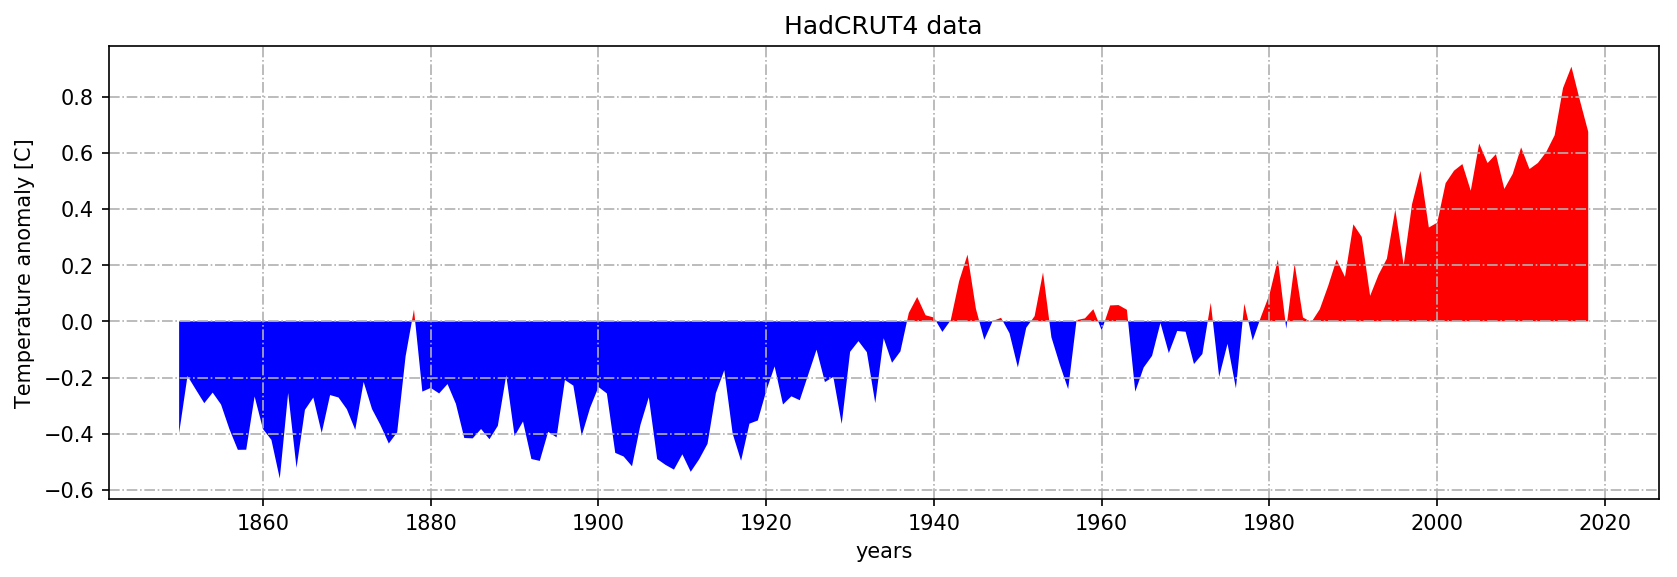

In [50]:
figure(figsize=figaspect(0.3))
fill_between(datesy, assty, 0., where=assty >= 0., facecolor='red', interpolate=True)
fill_between(datesy, assty, 0., where=assty <= 0., facecolor='blue', interpolate=True)
# plot(dates,asst)
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [C]')
title('HadCRUT4 data')
# savefig('./Results/hadcrut_04.png')

Text(0.5, 1.0, 'HadCRUT4 data')

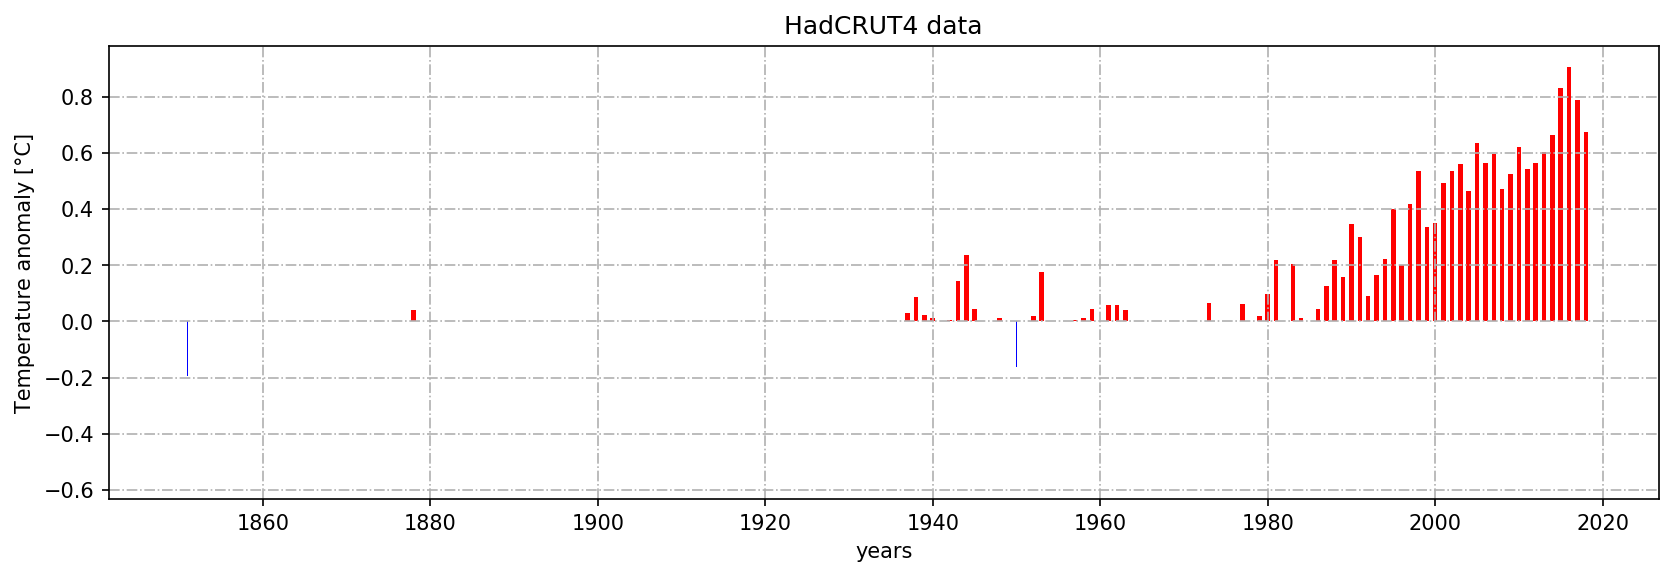

In [51]:
figure(figsize=figaspect(0.3))
w = 200.
bar(datesy[assty>=0.], assty[assty>=0.],w,color='r')
bar(datesy[assty<=0.], assty[assty<=0.],color='b')

# plot(dates,asst)
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [\u00b0C]')
title('HadCRUT4 data')
# savefig('./Results/hadcrut_04.png')

Найдем линейный тренд

In [52]:
polyfit(datesy,assty,1)

TypeError: ufunc add cannot use operands with types dtype('<M8[Y]') and dtype('float64')

Нельзя применить к дате/времени!

In [53]:
reg = polyfit(datesy.astype('float'),assty,1)
reg

array([0.0056075 , 0.12086997])

In [54]:
trend = polyval(reg,datesy.astype('float'))

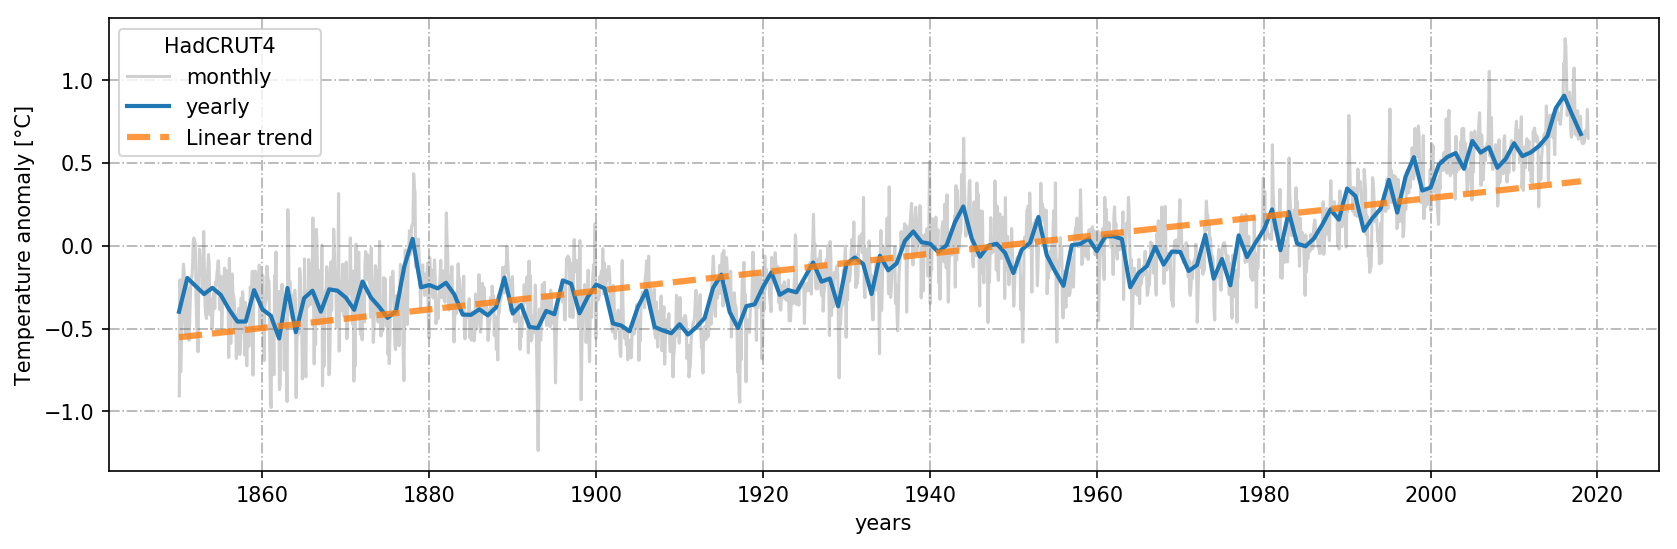

In [55]:
figure(figsize=figaspect(0.3))
plot(dates,asst,label='monthly',color='0.4',alpha=0.3)
plot(datesy,assty,label='yearly',lw=2.)
grid(True,linestyle='-.')
plot(datesy,trend,linestyle='--',lw=3.,alpha=0.8,label='Linear trend')

# plot(dates,asst)
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [\u00b0C]')
legend(title = 'HadCRUT4')
savefig('./Results/hadcrut_05.png')

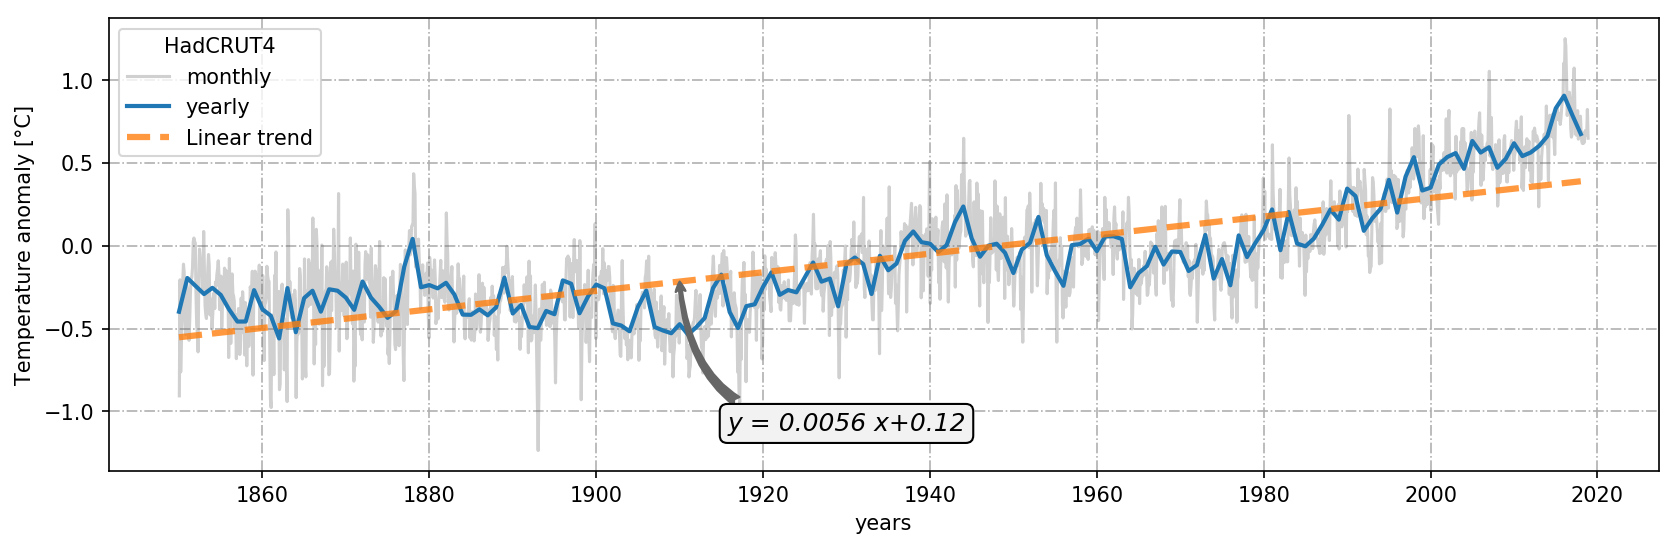

In [56]:
figure(figsize=figaspect(0.3))
plot(dates,asst,label='monthly',color='0.4',alpha=0.3)
plot(datesy,assty,label='yearly',lw=2.)
grid(True,linestyle='-.')
plot(datesy,trend,linestyle='--',lw=3.,alpha=0.8,label='Linear trend')

# plot(dates,asst)
grid(True,linestyle='-.')
xlabel('years')
ylabel('Temperature anomaly [\u00b0C]')
legend(title = 'HadCRUT4')
x,y = datesy[60],trend[60]
xstr,ystr = datesy[80], -1.
annotate('y = {:6.4f} x+{:4.2f}'.format(*reg),xy = (x,y),xytext = (xstr,ystr),
         ha='center', va='top',
         fontsize=12,style='italic',
         bbox=dict(boxstyle="round", fc="0.95"),
         arrowprops = dict(arrowstyle="fancy",color="0.4", shrinkB=100,connectionstyle='arc3,rad=-0.5'))
savefig('./Results/hadcrut_06.png')